In [13]:
import pandas as pd
import numpy as np
import spacy
import re
from utils.MasterDictionary import load_masterdictionary



In [14]:
def read_data(filename: str) -> pd.DataFrame:
    return pd.read_csv(f"data/dataset/{filename}.csv",
                       index_col=0, parse_dates=True)

df_statement = read_data("FOMC/statement")
df_speech = read_data("FOMC/speech")
df_minutes = read_data("FOMC/minutes")
df_can = read_data("can_statements")

In [15]:
df_speech.shape, df_statement.shape, df_minutes.shape, df_can.shape

((1607, 4), (201, 4), (229, 4), (35, 2))

In [16]:
df_minutes["speaker"].unique()

array(['Alan Greenspan', 'Ben Bernanke', 'Janet Yellen', 'Jerome Powell',
       'other'], dtype=object)

In [17]:
df_speech.dropna(inplace=True)
df_statement.dropna(inplace=True)
df_minutes.dropna(inplace=True)
df_can.dropna(inplace=True)

In [18]:
df_speech[df_speech["speaker"].str.contains(pat='Bernanke|Powell|Yellen|Greenspan', regex=True)]

,date,contents,speaker,title
0,1996-06-13,Remarks by Chairman Alan Greenspan\nBank super...,Chairman Alan Greenspan,Bank supervision in a world economy
3,1996-09-19,Remarks by Chairman Alan Greenspan\nRegulation...,Chairman Alan Greenspan,Regulation and electronic payment systems
5,1996-10-05,Remarks by Chairman Alan Greenspan\nBank super...,Chairman Alan Greenspan,"Bank supervision, regulation, and risk"
6,1996-10-07,Remarks by Chairman Alan Greenspan\nU.S. Treas...,Chairman Alan Greenspan,U.S. Treasury securities market: Lessons from ...
9,1996-10-16,Remarks by Chairman Alan Greenspan\nTechnologi...,Chairman Alan Greenspan,Technological advances and productivity
...,...,...,...,...
1574,2022-05-24,"The Federal Reserve, the central bank of the U...",Chair Jerome H. Powell,Video
1575,2022-05-24,"The Federal Reserve, the central bank of the U...",Chair Jerome H. Powell,Welcoming Remarks
1579,2022-06-17,"The Federal Reserve, the central bank of the U...",Chair Jerome H. Powell,Welcoming Remarks
1588,2022-08-26,"The Federal Reserve, the central bank of the U...",Chair Jerome H. Powell,Monetary Policy and Price Stability


On veut conserver seulement les textes présentés par les "Governor"

In [19]:
def filter_president_only(df: pd.DataFrame) -> pd.DataFrame:
    return df[df["speaker"].str.contains(pat='Bernanke|Powell|Yellen|Greenspan', regex=True)]

In [20]:
df_speech = filter_president_only(df_speech)
df_statement = filter_president_only(df_speech)
df_minutes = filter_president_only(df_speech)

In [21]:
df_minutes["contents"].iloc[-1]

"The Federal Reserve, the central bank of the United States, provides\n          the nation with a safe, flexible, and stable monetary and financial\n          system.\n\n[SECTION]\n\nFederal Open Market Committee\n\n[SECTION]\n\nMonetary Policy Principles and Practice\n\n[SECTION]\n\nPolicy Implementation\n\n[SECTION]\n\nReports\n\n[SECTION]\n\nReview of Monetary Policy Strategy, Tools, and\n                    Communications\n\n[SECTION]\n\nInstitution Supervision\n\n[SECTION]\n\nReports\n\n[SECTION]\n\nReporting Forms\n\n[SECTION]\n\nSupervision & Regulation Letters\n\n[SECTION]\n\nBanking Applications & Legal Developments\n\n[SECTION]\n\nRegulatory Resources\n\n[SECTION]\n\nBanking & Data Structure\n\n[SECTION]\n\nFinancial Stability Assessments\n\n[SECTION]\n\nFinancial Stability Coordination & Actions\n\n[SECTION]\n\nReports\n\n[SECTION]\n\nRegulations & Statutes\n\n[SECTION]\n\nPayment Policies\n\n[SECTION]\n\nReserve Bank Payment Services & Data\n\n[SECTION]\n\nFinancial Market

In [22]:
def clean_speech_text(df: pd.DataFrame):
    df_new = df.copy()
    full_text_col = df_new["contents"].apply \
        (lambda x: x.replace('\n\n[SECTION]\n\n', '').replace('\n', ' ').replace('\r', ' ').strip())
    full_text_col = full_text_col.apply(lambda x: re.sub(r'(http)\S+(htm)(l)?', '', x))
    full_text_col = full_text_col.apply(lambda x: re.sub(r'(www.)\S+', '', x))
    full_text_col = full_text_col.apply(lambda x: re.sub(r'[\d]', '', x))
    full_text_col = full_text_col.str.replace('—', ' ')
    full_text_col = full_text_col.str.replace('-', ' ')
    full_text_col = full_text_col.apply(lambda x: re.sub(r'[^\w\s]', '', x))
    full_text_col = full_text_col.apply(lambda x: re.sub(r'([Rr]eturn to text)', '', x))
    full_text_col = full_text_col.apply(lambda x: re.sub(r'([Pp]lay [vV]ideo)', '', x))
    full_text_col = full_text_col.apply(lambda x: re.sub(r'function()', '', x))
    full_text_col = full_text_col.apply(lambda x: re.sub(r'/[^\s]{15,}/', '', x))
    df_new.drop(labels='contents', axis="columns", inplace=True)
    df_new['contents'] = full_text_col
    return df_new

In [23]:
df_minutes = clean_speech_text(df_minutes)
df_speech = clean_speech_text(df_speech)
df_statement = clean_speech_text(df_statement)



In [24]:
df_minutes["contents"].iloc[3]

'Remarks by Chairman Alan Greenspan US Treasury securities market Lessons from Alexander Hamilton At the Annual Public Service Awards Dinner of the Public Securities Association New York New York October  I thank the members of the Public Securities Association for bestowing upon me this award for distinguished public service  I am particularly honored by the company that I keep as a winner of this award as previous recipients have included Senators Daniel Patrick Moynihan Christopher Dodd and Kay Bailey Hutchison and my predecessor as Chairman of the Federal Reserve Paul VolckerI trust that everyone in this audience would agree that the US government securities market works as well as any on earth and generates widespread macroeconomic benefits  In one sense that is regrettable  The market has become so efficient in part because of the  economies of scale associated with the large volume of Treasury debt issued over the years  While the massive federal debt has allowed traders to refi

In [25]:
def find_start_speech(text: str):
    try:
        idx_start = re.search("Share", text).start()
        return text[idx_start + 5:]
    except:
        return text


In [26]:
def replace_white_spaces(text: str):
    return " ".join(text.split())

df_statement["contents"] = df_statement['contents'].apply(lambda x: replace_white_spaces(x))
df_speech["contents"] = df_speech['contents'].apply(lambda x: replace_white_spaces(x))
df_minutes["contents"] = df_minutes['contents'].apply(lambda x: replace_white_spaces(x))

In [27]:
df_statement["contents"].iloc[10]

'It is a pleasure to be with you this afternoon as you discuss some of the most fundamental issues raised by our new information and communications technologiesThe topic Senator Bennett has asked us all to address is privacy in the information age The central dilemma in these discussions almost always involves fundamental choices about how to strike prudent balances among the needs of individuals for privacy in their financial and commercial transactions as well as their personal communications the needs of commerce to bring us new products and new means to communicate and the needs of the authorities to provide for the effective administration of government and to ensure the public safety These are not easy choices I think we all need to have a healthy respect for all sides of the debate Even further we need to be aware that the balances we strike in one era may need to be reexamined as technology and circumstances changeThe dictionary defines privacy as the state of being free from u

In [28]:
df_statement["contents"] = df_statement['contents'].apply(lambda x: find_start_speech(x))
df_speech["contents"] = df_speech['contents'].apply(lambda x: find_start_speech(x))
df_minutes["contents"] = df_minutes['contents'].apply(lambda x: find_start_speech(x))



In [29]:
df_speech["contents"].iloc[10]

'It is a pleasure to be with you this afternoon as you discuss some of the most fundamental issues raised by our new information and communications technologiesThe topic Senator Bennett has asked us all to address is privacy in the information age The central dilemma in these discussions almost always involves fundamental choices about how to strike prudent balances among the needs of individuals for privacy in their financial and commercial transactions as well as their personal communications the needs of commerce to bring us new products and new means to communicate and the needs of the authorities to provide for the effective administration of government and to ensure the public safety These are not easy choices I think we all need to have a healthy respect for all sides of the debate Even further we need to be aware that the balances we strike in one era may need to be reexamined as technology and circumstances changeThe dictionary defines privacy as the state of being free from u

In [30]:
load_model = spacy.load('en_core_web_sm')

In [31]:
stopwords = load_model.Defaults.stop_words


In [32]:
def apply_lemmatization(text: str):
    doc = load_model(text)
    return " ".join([token.lemma_ for token in doc])

In [33]:
N = 100

In [34]:
df_statement["contents"] = df_statement['contents'][-N:-1].apply(lambda x: apply_lemmatization(x))
df_speech["contents"] = df_speech['contents'][-N:-1].apply(lambda x: apply_lemmatization(x))
df_minutes["contents"] = df_minutes['contents'][-N:-1].apply(lambda x: apply_lemmatization(x))

In [35]:
df_speech["contents"].iloc[-2]

'the Federal Reserve the central bank of the United States provide the nation with a safe flexible and stable monetary and financial systemfederal Open Market CommitteeMonetary Policy Principles and PracticePolicy implementationreportsreview of Monetary Policy Strategy Tools and CommunicationsInstitution SupervisionReportsReporting FormsSupervision Regulation LettersBanking Applications Legal DevelopmentsRegulatory ResourcesBanking Data StructureFinancial Stability AssessmentsFinancial Stability Coordination actionsreportsregulation StatutesPayment PoliciesReserve Bank Payment Services DataFinancial Market Utilities InfrastructuresResearch Committees and ForumsWorking Papers and NotesData Models and ToolsBank Assets and LiabilitiesBank Structure DataBusiness FinanceDealer Financing TermsExchange Rates and International DataFinancial AccountsHousehold FinanceIndustrial ActivityInterest RatesMicro Data Reference Manual MDRMMoney Stock and Reserve BalancesOtherRegulationsSupervisionÂ Enfo

In [36]:
lm_dict_path = (f'data/dataset/dictionnaries/LoughranMcDonald/Loughran-McDonald_MasterDictionary_1993-2021.csv')
master_dictionaries, md_header, sentiment_categories, sentiment_dictionaries, stopwords, total_documents = \
    load_masterdictionary(lm_dict_path, True, None, True)


 ...Loading Master Dictionary 85,000
Master Dictionary loaded from file:
  data/dataset/dictionnaries/LoughranMcDonald/Loughran-McDonald_MasterDictionary_1993-2021.csv

  master_dictionary has 86,531 words.



In [37]:
import re

lmdict = {'Negative': [word.lower() for word in master_dictionaries.keys() if master_dictionaries[word].negative],
          'Positive': [word.lower() for word in master_dictionaries.keys() if master_dictionaries[word].positive]}

negate = ["aint", "arent", "cannot", "cant", "couldnt", "darent", "didnt", "doesnt", "ain't", "aren't", "can't",
          "couldn't", "daren't", "didn't", "doesn't", "dont", "hadnt", "hasnt", "havent", "isnt", "mightnt", "mustnt",
          "neither", "don't", "hadn't", "hasn't", "haven't", "isn't", "mightn't", "mustn't", "neednt", "needn't",
          "never", "none", "nope", "nor", "not", "nothing", "nowhere", "oughtnt", "shant", "shouldnt", "wasnt",
          "werent", "oughtn't", "shan't", "shouldn't", "wasn't", "weren't", "without", "wont", "wouldnt", "won't",
          "wouldn't", "rarely", "seldom", "despite", "no", "nobody"]

print(f"Number of positive word: {len(lmdict['Positive'])}")
print(f"Number of negative word: {len(lmdict['Negative'])}")

Number of positive word: 354
Number of negative word: 2355


In [38]:
lmdict

{'Negative': ['abandon',
  'abandoned',
  'abandoning',
  'abandonment',
  'abandonments',
  'abandons',
  'abdicated',
  'abdicates',
  'abdicating',
  'abdication',
  'abdications',
  'aberrant',
  'aberration',
  'aberrational',
  'aberrations',
  'abetting',
  'abnormal',
  'abnormalities',
  'abnormality',
  'abnormally',
  'abolish',
  'abolished',
  'abolishes',
  'abolishing',
  'abrogate',
  'abrogated',
  'abrogates',
  'abrogating',
  'abrogation',
  'abrogations',
  'abrupt',
  'abruptly',
  'abruptness',
  'absence',
  'absences',
  'absenteeism',
  'abuse',
  'abused',
  'abuses',
  'abusing',
  'abusive',
  'abusively',
  'abusiveness',
  'accident',
  'accidental',
  'accidentally',
  'accidents',
  'accusation',
  'accusations',
  'accuse',
  'accused',
  'accuses',
  'accusing',
  'acquiesce',
  'acquiesced',
  'acquiesces',
  'acquiescing',
  'acquit',
  'acquits',
  'acquittal',
  'acquittals',
  'acquitted',
  'acquitting',
  'adulterate',
  'adulterated',
  'adult

In [39]:
def negated(word):
    """
    Determine if preceding word is a negation word
    """
    if word.lower() in negate:
        return True
    else:
        return False

In [40]:
def tone_count_with_negation_check(dict, article):
    """
    Count positive and negative words with negation check. Account for simple negation only for positive words.
    Simple negation is taken to be observations of one of negate words occurring within three words
    preceding a positive words.
    """
    pos_count = 0
    neg_count = 0

    pos_words = []
    neg_words = []

    input_words = re.findall(r'\b([a-zA-Z]+n\'t|[a-zA-Z]+\'s|[a-zA-Z]+)\b', article.lower())

    word_count = len(input_words)

    for i in range(0, word_count):
        if input_words[i] in dict['Negative']:
            neg_count += 1
            neg_words.append(input_words[i])
        if input_words[i] in dict['Positive']:
            if i >= 3:
                if negated(input_words[i - 1]) or negated(input_words[i - 2]) or negated(input_words[i - 3]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 2:
                if negated(input_words[i - 1]) or negated(input_words[i - 2]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 1:
                if negated(input_words[i - 1]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 0:
                pos_count += 1
                pos_words.append(input_words[i])

    results = [word_count, pos_count, neg_count, pos_words, neg_words]

    return results

In [41]:
df_speech.dropna(inplace=True)
df_statement.dropna(inplace=True)
df_minutes.dropna(inplace=True)
df_can.dropna(inplace=True)

In [43]:

temp = [tone_count_with_negation_check(lmdict, x) for x in Data.contents]
temp = pd.DataFrame(temp)

Data['wordcount'] = temp.iloc[:,0].values
Data['NPositiveWords'] = temp.iloc[:,1].values
Data['NNegativeWords'] = temp.iloc[:,2].values

#Sentiment Score normalized by the number of words
Data['sentiment'] = (Data['NPositiveWords'] - Data['NNegativeWords']) / Data['wordcount'] * 100

Data['Poswords'] = temp.iloc[:,3].values
Data['Negwords'] = temp.iloc[:,4].values

In [44]:
Data.head()

,date,speaker,title,contents,wordcount,NPositiveWords,NNegativeWords,sentiment,Poswords,Negwords
1205,2015-11-12,Chair Janet L. Yellen,Welcoming Remarks,the Federal Reserve the central bank of the Un...,705,11,13,-0.283688,"[stable, stability, stability, pleasure, stabl...","[crisis, crisis, critically, crisis, crisis, a..."
1208,2015-11-17,Governor Jerome H. Powell,Central Clearing in an Interdependent World,the Federal Reserve the central bank of the Un...,2734,69,55,0.512070,"[stable, stability, stability, good, opportuni...","[ill, crisis, loss, suffer, lack, panic, crisi..."
1210,2015-11-20,Governor Jerome H. Powell,Opening Remarks,the Federal Reserve the central bank of the Un...,1150,22,11,0.956522,"[stable, stability, stability, successful, eff...","[defend, concern, volatility, satisfy (with ne..."
1212,2015-12-02,Chair Janet L. Yellen,The Economic Outlook and Monetary Policy,the Federal Reserve the central bank of the Un...,3744,54,76,-0.587607,"[stable, stability, stability, progress, stabl...","[recession, unemployment, decline, unemploymen..."
1219,2016-02-26,Governor Jerome H. Powell,"Discussion of the paper ""Language after Liftof...",the Federal Reserve the central bank of the Un...,2295,31,42,-0.479303,"[stable, stability, stability, insightful, goo...","[bad, volatility, threaten, deviate, lose, dam..."


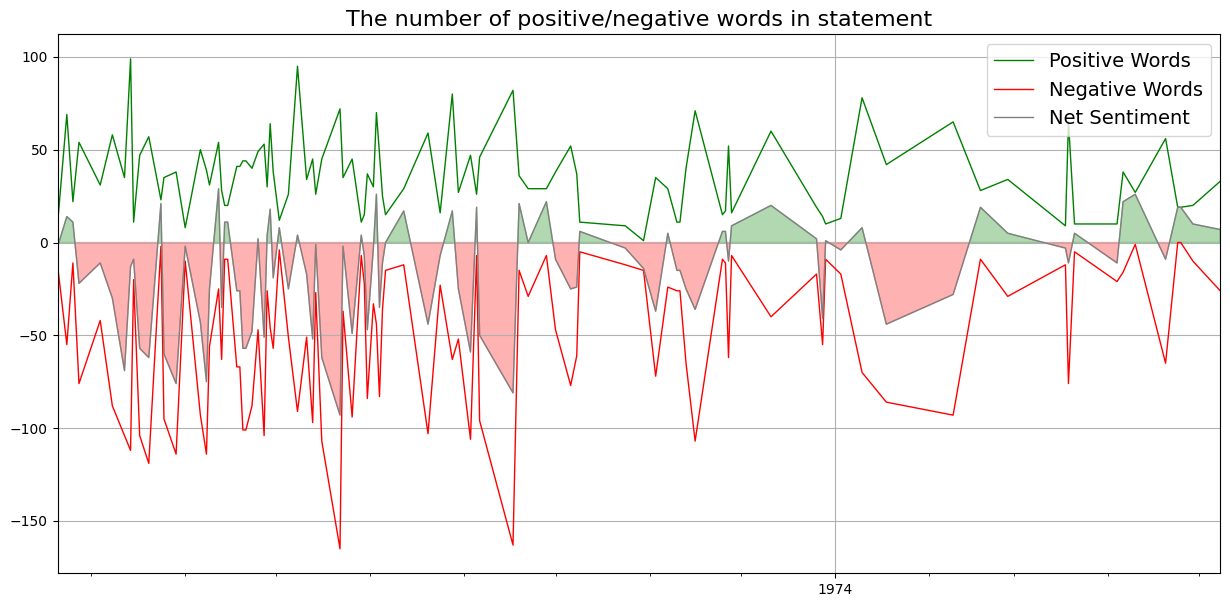

In [45]:
import matplotlib.pyplot as plt

NetSentiment = Data['NPositiveWords'] - Data['NNegativeWords']

plt.figure(figsize=(15,7))
ax = plt.subplot()

plt.plot(Data.index, Data['NPositiveWords'], c='green', linewidth= 1.0)
plt.plot(Data.index, Data['NNegativeWords']*-1, c='red', linewidth=1.0)
plt.plot(Data.index, NetSentiment, c='grey', linewidth=1.0)

plt.title('The number of positive/negative words in statement', fontsize=16)
plt.legend(['Positive Words', 'Negative Words', 'Net Sentiment'], prop={'size': 14}, loc=1)

ax.fill_between(Data.index, NetSentiment, where=(NetSentiment > 0), color='green', alpha=0.3, interpolate=True)
ax.fill_between(Data.index, NetSentiment, where=(NetSentiment <= 0), color='red', alpha=0.3, interpolate=True)

import matplotlib.dates as mdates
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
datemin = Data.index[0]
datemax = Data.index[-1]

ax.set_xlim(datemin, datemax)

ax.grid(True)

plt.show()

In [46]:
df_can["text"][0]

'The Bank of Canada today increased its target for the overnight rate to 1½%, with the Bank Rate at 1¾% and the deposit rate at 1½%. The Bank is also continuing its policy of quantitative tightening (QT).\nInflation globally and in Canada continues to rise, largely driven by higher prices for energy and food. In Canada, CPI inflation reached 6.8% for the month of April – well above the Bank’s forecast – and will likely move even higher in the near term before beginning to ease. As pervasive input price pressures feed through into consumer prices, inflation continues to broaden, with core measures of inflation ranging between 3.2% and 5.1%. Almost 70% of CPI categories now show inflation above 3%. The risk of elevated inflation becoming entrenched has risen. The Bank will use its monetary policy tools to return inflation to target and keep inflation expectations well anchored.\nThe increase in global inflation is occurring as the global economy slows. The Russian invasion of Ukraine, Ch